In [21]:
# -------- Code Outline -------- #
# Code splits the data into segments
# Segments used in Henggui's study split the data
# Into 120ms chunks which start at 2/3 RR interval
# Of the previous beat

import numpy as np
import matplotlib.pyplot as plt 
import pickle

In [22]:
# -------- Loading -------- #
# Load in all the relevant data

# Load in the peaks
with open('Peak Arrays From Pickus/8455_Pickus_R_Peaks.pkl', 'rb') as f:
    Peaks = pickle.load(f)
    
# Load in the de-noised original data
with open('De-Noised Data/afdb-de noised/8455DN.pkl', 'rb') as f:
    Data = pickle.load(f)

In [23]:
# -------- Segmentation -------- #
# Split the beats up into segments based on the peak array

# Find the 2/3rd point of the first peak distance
# Then we just segment the data into chunks of 120ms
# All starting from the 2/3rd point of the previous interval

# 2/3rd into first peak distance
initial_point = int(round(Peaks[0] * (2/3)))

# Split the data into segmented chunks
segments = []

# Loop over all the beats, splitting into segments
# Do this until every peak has been covered (every beat)

beats = len(Peaks)
for i in range(1,beats):
    # We want segments of 120ms
    end_point = (initial_point + 300)
    segments.append(Data[initial_point:end_point])
    # Now reset the initial point as 2/3rd of the next RR interval
    initial_point = (Peaks[i - 1] + int(round((Peaks[i] - Peaks[i - 1]) * (2/3))))
#     print(end_point)

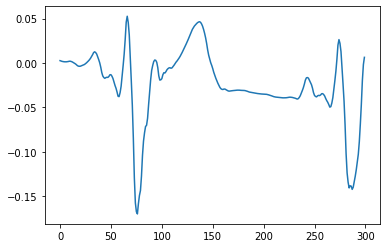

In [24]:
# -------- Plotter -------- #

# Plot the segments
# plt.plot(Data[:1000])
plt.plot(segments[25])
# plt.plot(Data[:200])

In [25]:
# -------- Data Saved -------- #
# Save the segments for this file

# Export the segments array as a pickle file

filename = '8455_Segments_Old_DWT'

# This line uses pickle to save the segments array as a .pkl file

with open('{}.pkl'.format(filename), 'wb') as f:
     pickle.dump(segments, f)